# Imports

In [10]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree, datasets
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Data
## Input data - 1st example iris data

In [11]:
iris = datasets.load_iris()
X = iris.data[:, :2]  ## only takes the first two features.
y = iris.target

In [12]:
## create an instance of DecisionTreeClassifier and fit the data.
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=2)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

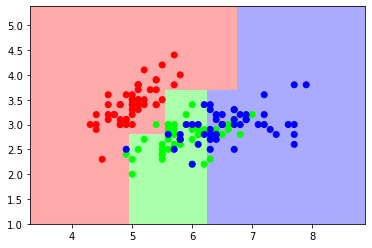

In [13]:
h = .02  ## step size in the mesh

## Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



## Plot the decision boundary. For that, we will assign a color to each
## point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])

## Put the resulting areas into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Data
## Input data - 2nd example tennis playing data

In [6]:
attribute_names = ("Play", "Outlook", "Temp", "Humidity", "Windy")

data = [("No", "Sunny", "Hot", "High", "False"),
        ("No", "Sunny", "Hot", "High", "True"),
        ("Yes", "Overcast", "Hot", "High", "False"),
        ("Yes", "Rain", "Mild", "High", "False"),
        ("Yes", "Rain", "Cool", "Normal", "False"),
        ("No", "Rain", "Cool", "Normal", "True"),
        ("Yes", "Overcast", "Cool", "Normal", "True"),
        ("No", "Sunny", "Mild", "High", "False"),
        ("Yes", "Sunny", "Cool", "Normal", "False"),
        ("Yes", "Rain", "Mild", "Normal", "False"),
        ("Yes", "Sunny", "Mild", "Normal", "True"),
        ("Yes", "Overcast", "Mild", "High", "True"),
        ("Yes", "Overcast", "Hot", "Normal", "False"),
        ("No", "Rain", "Mild", "High", "True"),
       ]

new_data = ("?", "Rain", "Mild", "Normal", "False")

pprint(attribute_names)
pprint(data)

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

## Preprocessing

Scikit learn is not able to handle strings, therefore the data needs to be converted to a numeric representation first.

In [170]:
## The label encoder creates a mapping for all Strings
le = LabelEncoder()
le.fit(["Yes", "No", "Sunny", "Overcast", "Rain", "Hot", "Mild", "Cool", "High", "Normal", "True", "False"])

## Afterwards the data can be transformed with this mapping
scikit_data = np.array([le.transform(row) for row in data])
pprint(scikit_data)

## use the following command to translate it back to Strings 
# list(le.inverse_transform(scikit_data)) 

## also translate the new data 
scikit_predict = np.array(le.transform(new_data[1:]))

array([[ 5,  9,  3,  2,  1],
       [ 5,  9,  3,  2, 10],
       [11,  7,  3,  2,  1],
       [11,  8,  4,  2,  1],
       [11,  8,  0,  6,  1],
       [ 5,  8,  0,  6, 10],
       [11,  7,  0,  6, 10],
       [ 5,  9,  4,  2,  1],
       [11,  9,  0,  6,  1],
       [11,  8,  4,  6,  1],
       [11,  9,  4,  6, 10],
       [11,  7,  4,  2, 10],
       [11,  7,  3,  6,  1],
       [ 5,  8,  4,  2, 10]])


Split the data to seperate the different values for the attributes and the associated class.

In [171]:
X = scikit_data[:, 1:5]
Y = scikit_data[:, 0]
print(X, Y)

[[ 9  3  2  1]
 [ 9  3  2 10]
 [ 7  3  2  1]
 [ 8  4  2  1]
 [ 8  0  6  1]
 [ 8  0  6 10]
 [ 7  0  6 10]
 [ 9  4  2  1]
 [ 9  0  6  1]
 [ 8  4  6  1]
 [ 9  4  6 10]
 [ 7  4  2 10]
 [ 7  3  6  1]
 [ 8  4  2 10]] [ 5  5 11 11 11  5 11  5 11 11 11 11 11  5]


Split the data set into test and training data, for both X and Y

In [172]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.1, random_state = 100)

# Decision Tree
Build the Decision Tree and use entropy / information gain as the criterion to select the next attribute. 

For more details on possible parameters see [Scikit-learn: Decision Trees](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [184]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=2)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

Once the decision tree is built the additional example can be classified.

In [174]:
result = clf_entropy.predict(scikit_predict.reshape(1,-1))
print(le.inverse_transform(result))

['Yes']


## Prediction accuracy
To measure the accuracy we use the test set and compare the predictions to the actual class labels.

In [175]:
y_pred_en = clf_entropy.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  100.0
